In [21]:
import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score

In [22]:
pip install pandas-profiling

Note: you may need to restart the kernel to use updated packages.


In [23]:
df = pd.read_csv("red_wine.csv")
X = df.drop('type', axis=1)
y = df['type']

In [24]:
profile = ProfileReport(df, title="Profiling Report")

In [25]:
profile.to_file("profile_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [26]:
from sklearn.dummy import DummyClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = {
    'ZeroR': DummyClassifier(strategy='most_frequent'),
    'OneR': DecisionTreeClassifier(max_depth=1),
    'LR': LogisticRegression(max_iter=1000),
    'NB': GaussianNB(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(),
    'RF': RandomForestClassifier()
}
results_last = []

for name, model in models.items():
    scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    scores_acc = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} AUC(mean): {scores_auc.mean():.4f}') 
    print(f'{name} Accuracy(mean): {scores_acc.mean():.4f}') 


ZeroR AUC(mean): 0.5000
ZeroR Accuracy(mean): 0.5289
OneR AUC(mean): 0.8026
OneR Accuracy(mean): 0.7988
LR AUC(mean): 0.8799
LR Accuracy(mean): 0.7848
NB AUC(mean): 0.8954
NB Accuracy(mean): 0.8216
DT AUC(mean): 0.7531
DT Accuracy(mean): 0.7515
SVM AUC(mean): 0.8689
SVM Accuracy(mean): 0.5358
RF AUC(mean): 0.8848
RF Accuracy(mean): 0.7918


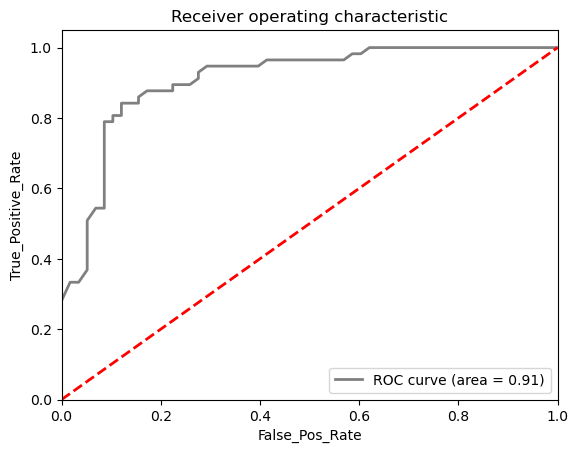

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


l = LabelEncoder()
df['type'] = l.fit_transform(df['type'])
X_train, X_test, y_train, y_test = train_test_split(df.drop('type', axis=1), df['type'], test_size=0.2, random_state=42)

rffb = RandomForestClassifier()
rffb.fit(X_train, y_train)

y_pred_plot = rffb.predict_proba(X_test)


fpr, tpr, thresholds = roc_curve(y_test, y_pred_plot[:,1])

roc_auc_result = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='grey', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_result)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False_Pos_Rate')
plt.ylabel('True_Positive_Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()




In [28]:

df_1 = pd.read_csv("white_wine.csv")
X = df_1.drop('type', axis=1)
y = df_1['type']
models_1 = {

    'NB': GaussianNB()
   
}
results_last_1 = []

for name, model in models_1.items():
    scores_auc = cross_val_score(model, X, y, cv=10, scoring='roc_auc')
    scores_acc = cross_val_score(model, X, y, cv=10, scoring='accuracy')
    print(f'{name} AUC(mean): {scores_auc.mean():.4f}') 
    print(f'{name} Accuracy(mean): {scores_acc.mean():.4f}') 


NB AUC(mean): 0.9500
NB Accuracy(mean): 0.9321
